In [ ]:
import pandas as pd

df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
df.rename(columns={'avg_glucose_level': 'glucose'}, inplace=True)
df.drop(['id'],axis=1,inplace=True)

numeric_cols = ["age", "avg_glucose_level", "bmi"]
cate_cols = df.columns.difference(numeric_cols)

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in cate_cols:
    df[col] = encoder.fit_transform(df[col])

In [ ]:
k = df[df['bmi'].isna() & (df['stroke'] == 1)].shape[0]
print(f"Số người bị stroke có bmi là NaN: {k}")

Số người bị stroke có bmi là NaN: 40


In [ ]:
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())


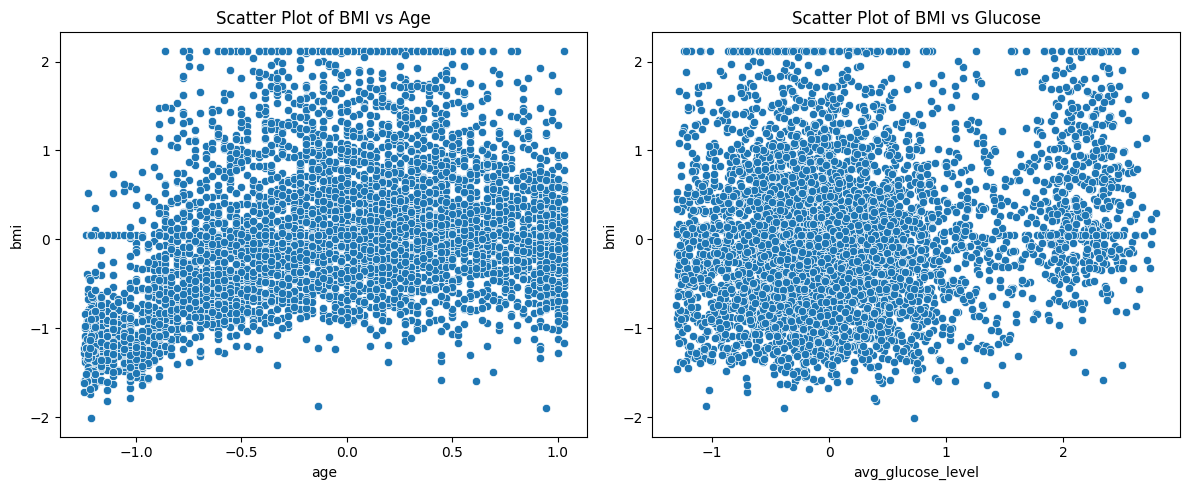

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

# Scatter plot BMI vs Age
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='age', y='bmi')
plt.title('Scatter Plot of BMI vs Age')

# Scatter plot BMI vs Glucose
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='avg_glucose_level', y='bmi')
plt.title('Scatter Plot of BMI vs Glucose')

plt.tight_layout()
plt.show()

# Hàm in ra độ đo train các kiểu

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def comp_model(X_train, y_train, X_val, y_val, metrics):

    models = {
        "LR": LogisticRegression(random_state=42, max_iter=1000),
        "DTree": DecisionTreeClassifier(random_state=42),
        "RForest": RandomForestClassifier(random_state=42)
    }

    train_scores = {metric: [] for metric in metrics}
    val_scores = {metric: [] for metric in metrics}

    # Huấn luyện và đánh giá các mô hình
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_val_pred = model.predict(X_val)
        y_train_proba = model.predict_proba(X_train)[:, 1] if hasattr(model, "predict_proba") else None
        y_val_proba = model.predict_proba(X_val)[:, 1] if hasattr(model, "predict_proba") else None

        # Tính các độ đo lỗi
        train_scores["Accuracy"].append(accuracy_score(y_train, y_train_pred))
        train_scores["F1 Score"].append(f1_score(y_train, y_train_pred))
        train_scores["AUC"].append(roc_auc_score(y_train, y_train_proba) if y_train_proba is not None else 0)
        val_scores["Accuracy"].append(accuracy_score(y_val, y_val_pred))
        val_scores["F1 Score"].append(f1_score(y_val, y_val_pred))
        val_scores["AUC"].append(roc_auc_score(y_val, y_val_proba) if y_val_proba is not None else 0)

    plt.figure(figsize=(8, 6))
    for i, metric in enumerate(metrics):
        plt.subplot(2, 3, i + 1)
        sns.barplot(x=list(models.keys()), y=train_scores[metric], color="skyblue", label="Train", width=0.5)
        sns.barplot(x=list(models.keys()), y=val_scores[metric], color="salmon", alpha=0.8, label="Validation", width=0.5)
        plt.title(metric, fontsize=12)
        plt.xticks(rotation=45, fontsize=9)
        plt.ylabel(metric, fontsize=10)
        plt.legend(fontsize=9)
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.3, wspace=0.3)
    plt.show()

# Không xử lí gì hết

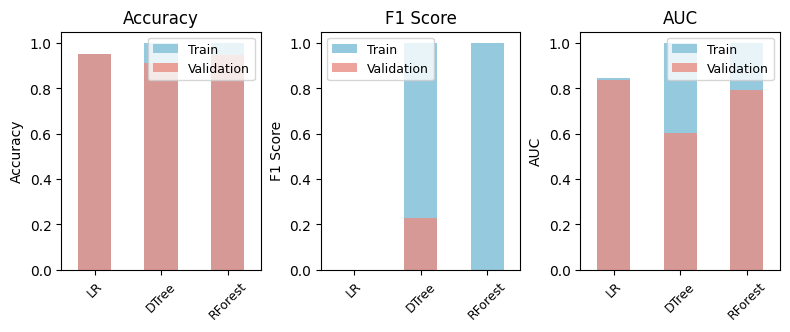

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=["stroke"])
y = df["stroke"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
metrics = ["Accuracy", "F1 Score",  "AUC"]
comp_model(X_train, y_train, X_val, y_val, metrics)

# Áp dụng Robust Scaler

In [ ]:
print(df['glucose'].min())
print(df['glucose'].isna().sum())

55.12
0


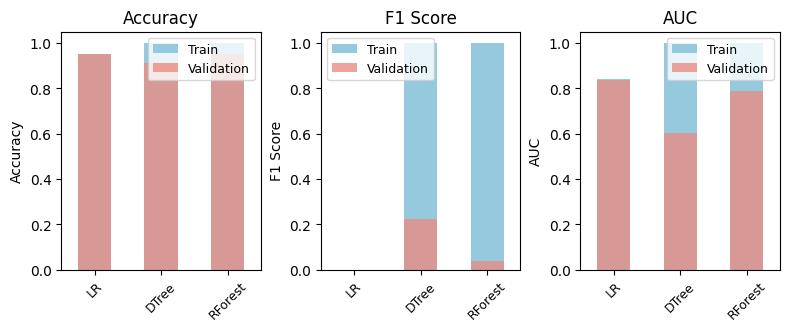

In [ ]:
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series.clip(lower=lower_bound, upper=upper_bound)

def ub(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    return upper_bound

numeric_cols = ["age", "glucose", "bmi"]

# Cap outlier cho glucose và bmi
df['bmi'] = cap_outliers(df['bmi'])

# Log transform glucose (trước khi scale)
df['glucose'] = np.log(df['glucose'] + 1)

# Áp dụng RobustScaler
numeric_cols = ["age", "glucose", "bmi"]
scaler = RobustScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

X = df.drop(columns=["stroke"])
y = df["stroke"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

from imblearn.over_sampling import BorderlineSMOTE
smote = BorderlineSMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

metrics = ["Accuracy", "F1 Score",  "AUC"]
comp_model(X_train, y_train, X_val, y_val, metrics)

# Áp dụng Robust Scaler, đồng thời cũng áp dụng random forest để

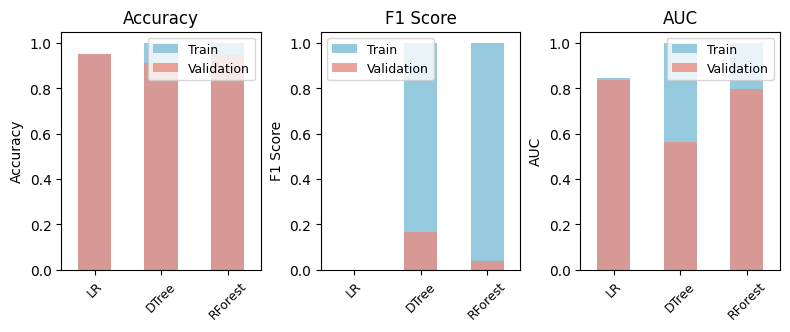

In [ ]:
import pandas as pd
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
df.rename(columns={'avg_glucose_level': 'glucose'}, inplace=True)
df.drop(['id'],axis=1,inplace=True)
numeric_cols = ["age", "avg_glucose_level", "bmi"]
cate_cols = df.columns.difference(cols_to_scale)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in cate_cols:
    df[col] = encoder.fit_transform(df[col])

def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series.clip(lower=lower_bound, upper=upper_bound)

numeric_cols = ["age", "glucose", "bmi"]
df['bmi'] = cap_outliers(df['bmi'])
df['glucose'] = np.log(df['glucose'] + 1)


import numpy as np
from sklearn.ensemble import RandomForestRegressor
df_bmi_notnull = df[df['bmi'].notnull()]
df_bmi_null = df[df['bmi'].isnull()]
features_for_bmi = df.columns.difference(['bmi', 'stroke'])
X_bmi_train = df_bmi_notnull[features_for_bmi]
y_bmi_train = df_bmi_notnull['bmi']
X_bmi_pred = df_bmi_null[features_for_bmi]
rf_reg = RandomForestRegressor(random_state=42, n_estimators=100)
rf_reg.fit(X_bmi_train, y_bmi_train)
bmi_pred = rf_reg.predict(X_bmi_pred)
df.loc[df['bmi'].isnull(), 'bmi'] = bmi_pred

def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series.clip(lower=lower_bound, upper=upper_bound)

def ub(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    return upper_bound

numeric_cols = ["age", "glucose", "bmi"]

# Cap outlier cho glucose và bmi
df['bmi'] = cap_outliers(df['bmi'])

# Log transform glucose (trước khi scale)
df['glucose'] = np.log(df['glucose'] + 1)

# Áp dụng RobustScaler
numeric_cols = ["age", "glucose", "bmi"]
scaler = RobustScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

X = df.drop(columns=["stroke"])
y = df["stroke"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
metrics = ["Accuracy", "F1 Score",  "AUC"]
comp_model(X_train, y_train, X_val, y_val, metrics)


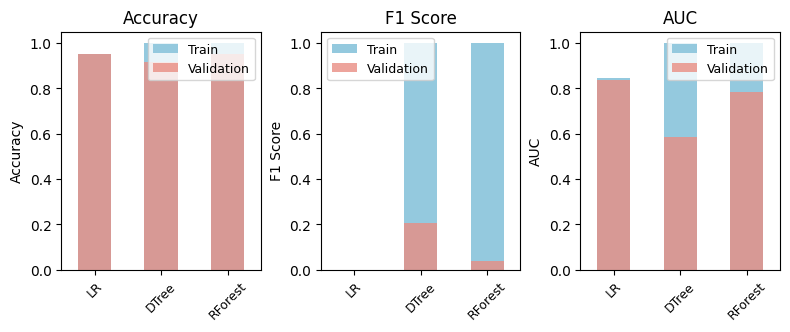

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Load và chuẩn bị data
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
df.rename(columns={'avg_glucose_level': 'glucose'}, inplace=True)
df.drop(['id'], axis=1, inplace=True)

numeric_cols = ["age", "glucose", "bmi"]
# Định nghĩa biến categorical
cols_to_scale = numeric_cols  # mình giả sử numeric_cols chính là cols_to_scale cho ví dụ
cate_cols = df.columns.difference(cols_to_scale)

encoder = LabelEncoder()
for col in cate_cols:
    df[col] = encoder.fit_transform(df[col].astype(str))  # ép kiểu string để tránh lỗi

# Cap outlier cho bmi trước
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series.clip(lower=lower_bound, upper=upper_bound)

df['bmi'] = cap_outliers(df['bmi'])

# Log transform glucose (trước khi scale)
df['glucose'] = np.log(df['glucose'] + 1)

# Áp dụng KNN Imputer chỉ cho cột bmi (vì chỉ có cột này missing)
imputer = KNNImputer(n_neighbors=5)
df[['bmi']] = imputer.fit_transform(df[['bmi']])

# Tiếp tục scale numeric_cols bằng RobustScaler
scaler = RobustScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Chuẩn bị dữ liệu cho mô hình
X = df.drop(columns=["stroke"])
y = df["stroke"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
metrics = ["Accuracy", "F1 Score",  "AUC"]

comp_model(X_train, y_train, X_val, y_val, metrics)

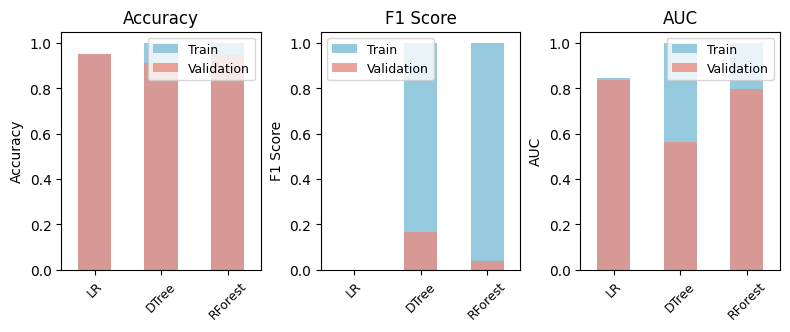

In [ ]:
import pandas as pd
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
df.rename(columns={'avg_glucose_level': 'glucose'}, inplace=True)
df.drop(['id'],axis=1,inplace=True)
numeric_cols = ["age", "avg_glucose_level", "bmi"]
cate_cols = df.columns.difference(cols_to_scale)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in cate_cols:
    df[col] = encoder.fit_transform(df[col])

def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series.clip(lower=lower_bound, upper=upper_bound)

numeric_cols = ["age", "glucose", "bmi"]
df['bmi'] = cap_outliers(df['bmi'])
df['glucose'] = np.log(df['glucose'] + 1)


import numpy as np
from sklearn.ensemble import RandomForestRegressor
df_bmi_notnull = df[df['bmi'].notnull()]
df_bmi_null = df[df['bmi'].isnull()]
features_for_bmi = df.columns.difference(['bmi', 'stroke'])
X_bmi_train = df_bmi_notnull[features_for_bmi]
y_bmi_train = df_bmi_notnull['bmi']
X_bmi_pred = df_bmi_null[features_for_bmi]
rf_reg = RandomForestRegressor(random_state=42, n_estimators=100)
rf_reg.fit(X_bmi_train, y_bmi_train)
bmi_pred = rf_reg.predict(X_bmi_pred)
df.loc[df['bmi'].isnull(), 'bmi'] = bmi_pred

def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series.clip(lower=lower_bound, upper=upper_bound)

def ub(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    return upper_bound

numeric_cols = ["age", "glucose", "bmi"]

# Cap outlier cho glucose và bmi
df['bmi'] = cap_outliers(df['bmi'])

# Log transform glucose (trước khi scale)
df['glucose'] = np.log(df['glucose'] + 1)

# Áp dụng RobustScaler
numeric_cols = ["age", "glucose", "bmi"]
scaler = RobustScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

X = df.drop(columns=["stroke"])
y = df["stroke"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

from imblearn.over_sampling import BorderlineSMOTE
smote = BorderlineSMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


metrics = ["Accuracy", "F1 Score",  "AUC"]
comp_model(X_train, y_train, X_val, y_val, metrics)

# Thử dùng SMOTE

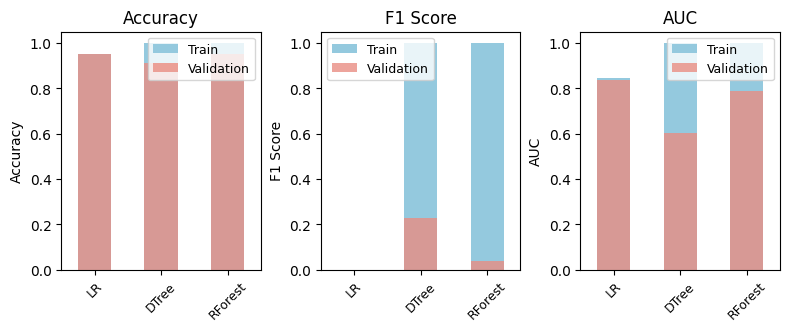

In [ ]:
import pandas as pd

df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
df.rename(columns={'avg_glucose_level': 'glucose'}, inplace=True)
df.drop(['id'],axis=1,inplace=True)

numeric_cols = ["age", "avg_glucose_level", "bmi"]
cate_cols = df.columns.difference(numeric_cols)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in cate_cols:
    df[col] = encoder.fit_transform(df[col])

df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series.clip(lower=lower_bound, upper=upper_bound)

df['bmi'] = cap_outliers(df['bmi'])
numeric_cols = ["age", "glucose", "bmi"]
scaler = RobustScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

X = df.drop(columns=["stroke"])
y = df["stroke"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

from imblearn.over_sampling import BorderlineSMOTE
smote = BorderlineSMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

metrics = ["Accuracy", "F1 Score",  "AUC"]
comp_model(X_train, y_train, X_val, y_val, metrics)


Index(['Residence_type', 'ever_married', 'gender', 'heart_disease',
       'hypertension', 'smoking_status', 'stroke', 'work_type'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:25:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


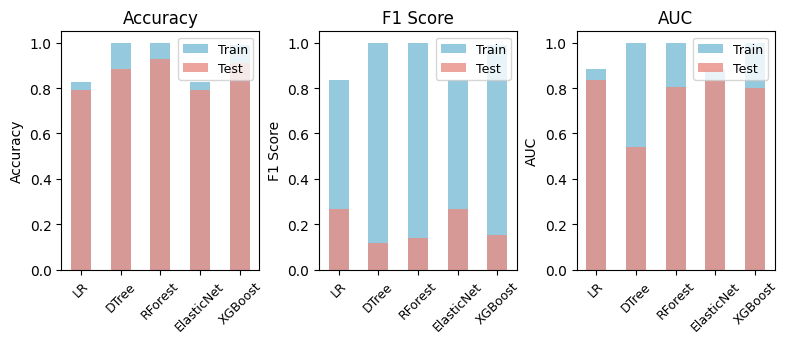

In [ ]:
import pandas as pd
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())
df['avg_glucose_level'] = np.log(df['avg_glucose_level'] + 1)
df.loc[df['bmi'] > 47.5, 'bmi'] = 47.5
df.drop(['id'],axis=1,inplace=True)
from sklearn.preprocessing import RobustScaler

cols_to_scale = ["age", "avg_glucose_level", "bmi"]

scaler = RobustScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
from sklearn.preprocessing import LabelEncoder

cols_to_encode = df.columns.difference(cols_to_scale)
print(cols_to_encode)

encoder = LabelEncoder()
label_mappings = {}

for col in cols_to_encode:
    df[col] = encoder.fit_transform(df[col])


from sklearn.model_selection import train_test_split

# Tách tập train và test (70:30) với stratify
X = df.drop(columns=["stroke"])
y = df["stroke"]

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


from imblearn.over_sampling import BorderlineSMOTE
borderline_smote = BorderlineSMOTE(random_state=42, kind='borderline-2')
X_train_2, y_train_2 = borderline_smote.fit_resample(X_train, y_train)



import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from xgboost import XGBClassifier
from sklearn.metrics import recall_score


def comp_model(X_train, y_train, X_test, y_test, metrics):

  models = {
      "LR": LogisticRegression(random_state=42, max_iter=1000),
      "DTree": DecisionTreeClassifier(random_state=42),
      "RForest": RandomForestClassifier(random_state=42),
      "ElasticNet": LogisticRegression(
        penalty='elasticnet',
        solver='saga',        # saga hỗ trợ elasticnet penalty
        l1_ratio=0.5,         # tỉ lệ kết hợp L1 và L2, bạn có thể chỉnh
        random_state=42,
        max_iter=1000
        ),
      "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

  }

  train_scores = {metric: [] for metric in metrics}
  test_scores = {metric: [] for metric in metrics}

  # Huấn luyện và đánh giá các mô hình
  for name, model in models.items():
      model.fit(X_train, y_train)

      # Dự đoán
      y_train_pred = model.predict(X_train)
      y_test_pred = model.predict(X_test)
      y_train_proba = model.predict_proba(X_train)[:, 1] if hasattr(model, "predict_proba") else None
      y_test_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

      # Tính các độ đo lỗi
      train_scores["Accuracy"].append(accuracy_score(y_train, y_train_pred))
      train_scores["F1 Score"].append(f1_score(y_train, y_train_pred))
      train_scores["AUC"].append(roc_auc_score(y_train, y_train_proba) if y_train_proba is not None else 0)

      test_scores["Accuracy"].append(accuracy_score(y_test, y_test_pred))
      test_scores["F1 Score"].append(f1_score(y_test, y_test_pred))
      test_scores["AUC"].append(roc_auc_score(y_test, y_test_proba) if y_test_proba is not None else 0)

  plt.figure(figsize=(8, 6))
  for i, metric in enumerate(metrics):
      plt.subplot(2, 3, i + 1)
      sns.barplot(x=list(models.keys()), y=train_scores[metric], color="skyblue", label="Train", width=0.5)
      sns.barplot(x=list(models.keys()), y=test_scores[metric], color="salmon", alpha=0.8, label="Test", width=0.5)
      plt.title(metric, fontsize=12)
      plt.xticks(rotation=45, fontsize=9)
      plt.ylabel(metric, fontsize=10)
      plt.legend(fontsize=9)
  plt.tight_layout()
  plt.subplots_adjust(hspace=0.3, wspace=0.3)
  plt.show()

metrics = ["Accuracy", "F1 Score",  "AUC"]
comp_model(X_train_2, y_train_2, X_val, y_val, metrics)